# Step 7
Context generation

In [1]:
import copy

import numpy as np
import matplotlib.pyplot as plt

import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.EnvironmentContextual import EnvironmentContextual
from Code.environment.Customer import Customer
from Code.UCBLearner4 import UCBLearner4
from Code.TSLearner4 import TSLearner4
from Code.ContextManager import ContextManager

%matplotlib inline

In [2]:
cust_json = "customer3.json"
today_customer = 300
var_cust = 10
p_lambda = 1.0
graph_json = "business_full_graph2.json"
arms = settings.prices

environment = EnvironmentContextual(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)

clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm = environment.estimate_clairvoyant()

print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

[array([[0.  , 0.04, 0.8 , 0.04],
       [0.  , 0.49, 0.26, 0.  ],
       [0.03, 0.6 , 0.03, 0.  ],
       [0.04, 0.8 , 0.04, 0.  ],
       [0.01, 0.36, 0.36, 0.01]]), array([[0.  , 0.  , 0.02, 0.5 ],
       [0.  , 0.  , 0.  , 0.7 ],
       [0.  , 0.04, 0.8 , 0.03],
       [0.5 , 0.02, 0.  , 0.  ],
       [0.5 , 0.  , 0.  , 0.  ]]), array([[0.02, 0.5 , 0.02, 0.  ],
       [0.16, 0.16, 0.  , 0.  ],
       [0.  , 0.  , 0.02, 0.5 ],
       [0.18, 0.04, 0.  , 0.  ],
       [0.  , 0.17, 0.7 , 0.17]]), array([[0.02, 0.5 , 0.02, 0.  ],
       [0.16, 0.16, 0.  , 0.  ],
       [0.  , 0.  , 0.02, 0.5 ],
       [0.18, 0.04, 0.  , 0.  ],
       [0.  , 0.17, 0.7 , 0.17]])]
loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
lo

In [3]:
aggregated_clairvoyant_reward = sum(clairvoyant_reward.values())
aggregated_clairvoyant_reward

18666.18786603528

In [4]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

CONTEXT_INTERVAL = 14
TIME_HORIZON = 300
NUM_ITERATION = 5

In [5]:
#unknown parameters
alphas = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) # uniform
prods_dist = np.ones((n_products,n_arms))   # all 1

customers = copy.deepcopy(environment.customers)

for customer in customers:
    customer.set_distribution_alpha(alphas)
    customer.set_num_prods(prods_dist)

UCB

In [6]:
rewards_iterations = []
aggregated_rewards_iterations  = []

for i in range(NUM_ITERATION):
    ucb4_learner = ContextManager(UCBLearner4, n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % CONTEXT_INTERVAL == 0:
            ucb4_learner.build_context()
            print(str(ucb4_learner.tree))
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb4_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        ucb4_learner.update(super_arm.copy(), report)
    rewards = ucb4_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
    aggregated_rewards_iterations.append(ucb4_learner.aggregate_rewards)
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape


Iteration # 1
0<1<-1<None, None>, -1<None, None>>, 1<-1<None, None>, -1<None, None>>>
loading: [                              ] 0.0%
{(0, 0): [3, 3, 3, 3, 3], (1, 0): [3, 3, 3, 3, 3], (0, 1): [3, 3, 3, 3, 3], (1, 1): [3, 3, 3, 3, 3]}
{(0, 0): [2, 2, 2, 2, 2], (1, 0): [3, 3, 2, 3, 2], (0, 1): [2, 2, 3, 2, 3], (1, 1): [2, 2, 3, 2, 2]}
{(0, 0): [2, 2, 1, 1, 1], (1, 0): [3, 3, 2, 3, 3], (0, 1): [1, 1, 3, 3, 3], (1, 1): [1, 1, 3, 3, 2]}
{(0, 0): [2, 1, 1, 1, 2], (1, 0): [2, 3, 2, 3, 2], (0, 1): [1, 1, 3, 2, 3], (1, 1): [1, 1, 3, 3, 2]}
{(0, 0): [2, 1, 1, 1, 0], (1, 0): [3, 3, 2, 3, 2], (0, 1): [1, 2, 2, 2, 3], (1, 1): [1, 2, 3, 2, 2]}
{(0, 0): [2, 1, 1, 1, 1], (1, 0): [3, 3, 2, 3, 2], (0, 1): [1, 3, 3, 2, 3], (1, 1): [1, 3, 3, 1, 2]}
{(0, 0): [2, 0, 0, 1, 2], (1, 0): [1, 3, 2, 3, 2], (0, 1): [1, 1, 2, 3, 2], (1, 1): [1, 0, 3, 3, 2]}
{(0, 0): [2, 1, 1, 1, 3], (1, 0): [3, 3, 2, 3, 3], (0, 1): [1, 0, 2, 1, 2], (1, 1): [1, 1, 3, 1, 2]}
{(0, 0): [2, 1, 1, 1, 2], (1, 0): [3, 3, 3, 3, 2], (0, 1): 

(5, 300)

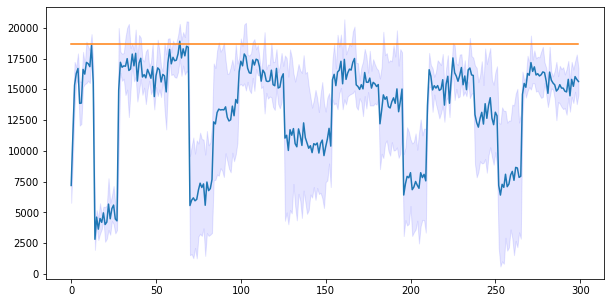

In [8]:
plt.figure(figsize=(10, 5))

mean = np.mean(aggregated_rewards_iterations, axis=0)
stdev = np.std(aggregated_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [aggregated_clairvoyant_reward for _ in range(len(rewards))])
plt.show()

In [9]:
features_list = list(clairvoyant_arms.keys())
rewards_iterations_tmp = {}
for features in features_list:
    rewards_iterations_tmp[features] = [[val[features] for val in row] for row in rewards_iterations]
rewards_iterations = rewards_iterations_tmp

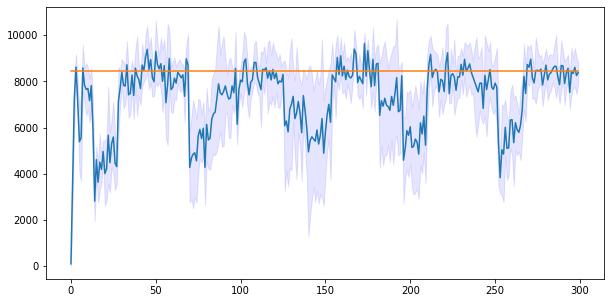

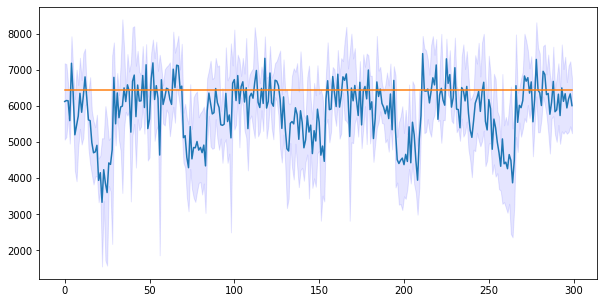

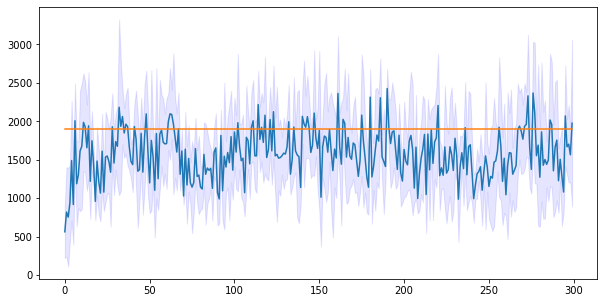

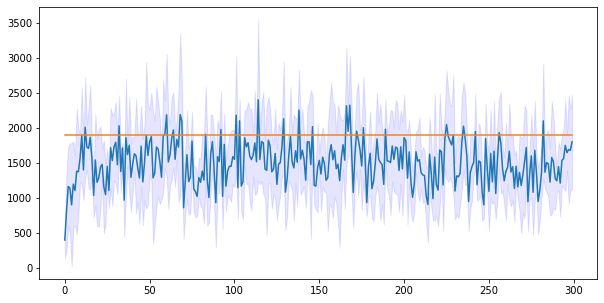

In [10]:
for features in features_list:
    plt.figure(figsize=(10, 5))

    mean = np.mean(rewards_iterations[features], axis=0)
    stdev = np.std(rewards_iterations[features], axis=0)

    plt.plot(range(len(mean)), mean)
    plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

    plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward[features] for _ in range(len(rewards))])
    plt.show()


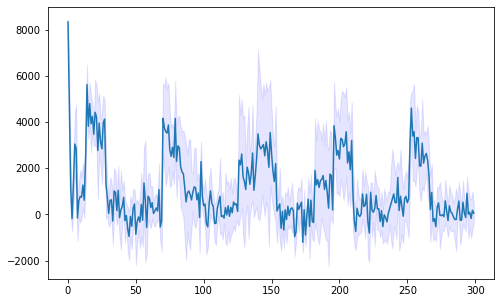

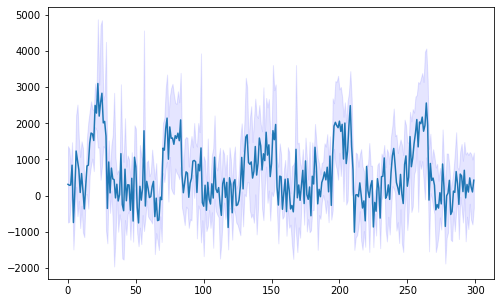

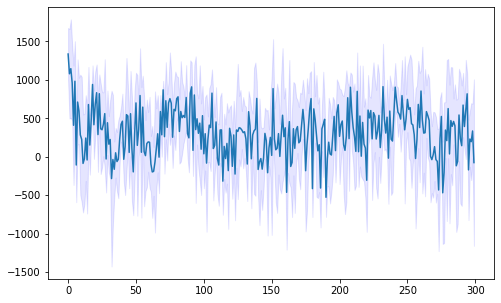

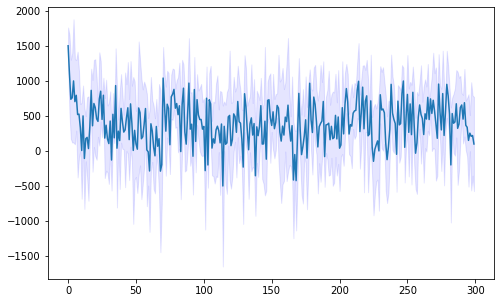

In [11]:
for features in features_list:
    plt.figure(figsize=(8,5))

    regret = clairvoyant_reward[features] - rewards_iterations[features]
    mean_regret = np.mean(regret, axis=0)
    std_regret = np.std(regret, axis=0)

    plt.plot(range(len(mean_regret)), mean_regret)
    plt.fill_between(range(len(mean_regret)), (mean_regret-std_regret), (mean_regret+std_regret), color='b', alpha=.1)
    plt.show()

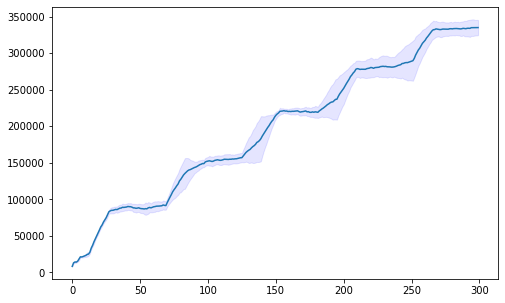

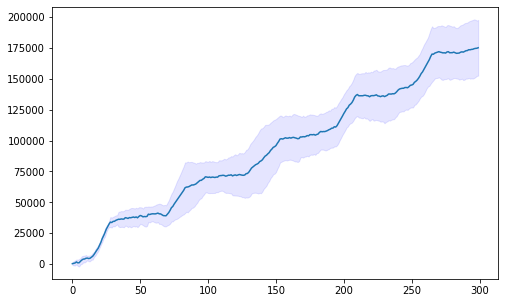

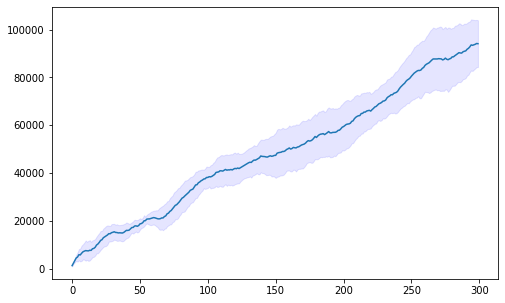

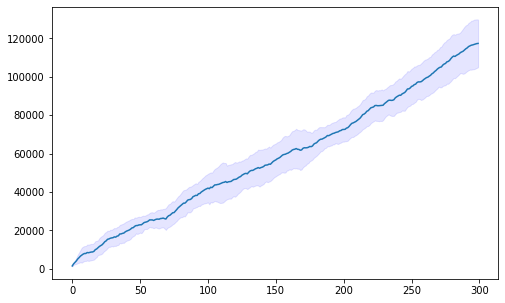

In [12]:
for features in features_list:
    plt.figure(figsize=(8,5))
    regret = clairvoyant_reward[features] - rewards_iterations[features]
    cumulative_regret = np.cumsum(regret, axis=1)
    cum_reg_mean = np.mean(cumulative_regret, axis=0)
    cum_reg_std = np.std(cumulative_regret, axis=0)

    plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
    plt.fill_between(range(len(cum_reg_mean)), (cum_reg_mean-cum_reg_std), (cum_reg_mean+cum_reg_std), color='b', alpha=.1)
    plt.show()

TS

In [ ]:
rewards_iterations = []
aggregated_rewards_iterations = []
for i in range(NUM_ITERATION):
    ts_learner4 = ContextManager(TSLearner4, n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 14 == 0:
            ts_learner4.build_context()
            print(str(ts_learner4.tree))

        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ts_learner4.select_superarm()
        report = environment.round(super_arm)
        ts_learner4.update(super_arm.copy(), report)
    rewards = ts_learner4.history_rewards
    rewards_iterations.append(np.array(rewards))
    aggregated_rewards_iterations.append(ts_learner4.aggregate_rewards)

rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape


Iteration # 1
0<1<-1<None, None>, -1<None, None>>, 1<-1<None, None>, -1<None, None>>>
loading: [                              ] 0.0%
loading: [=                             ] 3.3%
-1<None, None>
loading: [==                            ] 6.7%
0<-1<None, None>, -1<None, None>>
loading: [===                           ] 10.0%
loading: [====                          ] 13.3%
0<1<-1<None, None>, -1<None, None>>, -1<None, None>>
loading: [=====                         ] 16.7%
-1<None, None>
loading: [======                        ] 20.0%
0<-1<None, None>, 1<-1<None, None>, -1<None, None>>>
loading: [=======                       ] 23.3%
loading: [========                      ] 26.7%
0<-1<None, None>, -1<None, None>>
loading: [=========                     ] 30.0%
0<-1<None, None>, -1<None, None>>
loading: [==========                    ] 33.3%
loading: [===========                   ] 36.7%
0<-1<None, None>, -1<None, None>>
loading: [============                  ] 40.0%
-1<None, None>
loadi

In [ ]:
features_list = list(clairvoyant_arms.keys())
rewards_iterations_tmp = {}
for features in features_list:
    rewards_iterations_tmp[features] = [[val[features] for val in row] for row in rewards_iterations]
rewards_iterations = rewards_iterations_tmp

In [ ]:
plt.figure(figsize=(10, 5))

mean = np.mean(aggregated_rewards_iterations, axis=0)
stdev = np.std(aggregated_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [aggregated_clairvoyant_reward for _ in range(len(rewards))])
plt.show()


In [ ]:
for features in features_list:
    plt.figure(figsize=(10, 5))
    mean = np.mean(rewards_iterations[features], axis=0)
    stdev = np.std(rewards_iterations[features], axis=0)

    plt.plot(range(len(mean)), mean)
    plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

    plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward[features] for _ in range(len(rewards))])
    plt.show()

In [ ]:
for features in features_list:
    plt.figure(figsize=(8,5))

    regret = clairvoyant_reward[features] - rewards_iterations[features]
    mean_regret = np.mean(regret, axis=0)
    std_regret = np.std(regret, axis=0)

    plt.plot(range(len(mean_regret)), mean_regret)
    plt.fill_between(range(len(mean_regret)), (mean_regret-std_regret), (mean_regret+std_regret), color='b', alpha=.1)
    plt.show()

In [ ]:
a = np.mean(regret[:,200:], axis=0)
np.shape(a)
print(np.mean(a))

In [ ]:
for features in features_list:
    plt.figure(figsize=(8,5))
    regret = clairvoyant_reward[features] - rewards_iterations[features]
    cumulative_regret = np.cumsum(regret, axis=1)
    cum_reg_mean = np.mean(cumulative_regret, axis=0)
    cum_reg_std = np.std(cumulative_regret, axis=0)

    plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
    plt.fill_between(range(len(cum_reg_mean)), (cum_reg_mean-cum_reg_std), (cum_reg_mean+cum_reg_std), color='b', alpha=.1)
    plt.show()